# Business payment delinquency and bankruptcy prediction using deep learning techniques.



# Description: 
The prediction of payment delinquency and bankruptcy of a business has been a prominent subject in 
finance and economics for a considerable amount of time. This is because the financial health of a 
company is critical not just to its investors, creditors, shareholders, and partners but also to its buyers 
and suppliers. To predict the payment delinquency of firms more efficiently and accurately, researchers 
and practitioners have been committed to exploring various methods and techniques. 
The objective of our project is to employ a deep neural network model to predict payment delinquency 
and the likelihood of bankruptcy for firms. Although several machine learning models, such as decision 
trees, neural networks, and Support Vector Machines, have been used for this purpose in the past [1], 
the recent emergence and development of deep learning has provided a more effective and powerful 
approach for diverse applications in business and management, including credit scoring and bankruptcy 
prediction. 
Payment delinquency/Bankruptcy prediction is primarily a classification issue that can be solved using 
classification algorithms. The goal is to forecast whether a firm will become delinquent/bankrupt or not, 
which is a binary classification task. Accurate predictions necessitate the training of algorithms on 
datasets containing financial data extracted from various sources like credit bureaus. The training 
process includes the application of deep learning techniques to develop a classifier with high 
classification accuracy, which can then be used for prediction. This constitutes the fundamental 
objective of our project. 

#Data and Methodology 
Approach: 
Consistent with Mai et al. (2019), this study proposes a panel data structure for analyzing bureau data. LSTM based  Recurrent Neural Network (RNN) and Deep Neural Network architectures are explored.

Data Collection: 
The study will use panel data of 250,000 businesses from a credit bureau, that was available as part of FinTech Sandbox project. The dataset has 1000+ features and many of them are highly correlated. Dependent 
variables will be classified/labeled as good and bad based on the following definitions. Bad: Ever 
delinquent or bankrupt in next 12 months of performance window. Good: Never delinquent or bankrupt 
in next 12 months of performance window. Independent variables are extracted from the observation 
window,   at the beginning of the month. Data fields and variable descriptions are given in the data preperation section 


# Part1- Data Preparation
# Part2- Data Exploration- Information Value 
# Part3 -Data preperation - OneHot Encoding, test, training splits
# Part4 -Model Development,Neural Network Architecture, validation and Results

#Part 1

In [ ]:
from gensim.models import Word2Vec, KeyedVectors
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
with open('/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_JAN2020.CSV', 'r') as file:
    for i in range(5):
        line = file.readline()
        print(line)

"BIN","SEQUENCE NUMBER","FILLER01","ATC032","ATB019","ATD034","ATD035","ACC001","ACC002","ATB001","ATB002","ATB003","ATB004","ATB005","ATB006","ATB007","ATB008","ATB009","ATB010","ATB011","ATB012","ATB013","ATB014","ATB015","ATB016","ATB017","ATB018","ATC020","ATC021","ATC022","ATC023","ATC024","ATC025","ATC026","ATC027","ATC028","ATC029","ATC030","ATC031","ATP036","ATP037","ATP038","BRC010","BRC011","BRC012","BRO015","BRO016","BRO017","BRC013","BRC014","BRB005","BRB006","BRB007","BRB001","BRB002","BRB003","BRB004","BRC008","BRC009","BRP018","BRP019","BRP020","BRP021","BRP022","BRP023","BKC006","BKC007","BKC008","BKO009","BKB001","BKB002","BKB003","BKO010","BKO011","BKC004","BKC005","DMO003","CLB001","CLC010","CLC011","CLC012","CLC013","CLB002","CLB003","CLB004","CLB005","CLC006","CLC007","CLC008","CLC009","CLO014","CLO015","CLP016","CLP017","CLP018","CLP019","CTC033","CTC034","CTC035","CTC036","FILLER02","CTD038","CTB001","CTB002","CTB003","CTB004","CTB005","CTB006","CTB007","CTB008",

In [ ]:
with open('/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_CRDB_JAN2020.CSV', 'r') as file:
    for i in range(5):
        line = file.readline()
        print(line)

"EXPERIAN BUSINESS ID","FILLER","BUSINESS NAME","ADDRESS","CITY","STATE","ZIP CODE","ZIP PLUS 4","CARRIER ROUTE","COUNTY CODE","COUNTY NAME","PHONE NUMBER","MSA CODE","MSA DESCRIPTION","ESTABLISH DATE","LATEST REPORTED DATE","YEARS IN FILE","GEO CODE LATITUDE","GEO CODE LATITUDE DIRECTION","GEO CODE LONGITUDE","GEO CODE LONGITUDE DIRECTION","RECENT UPDATE CODE","YEARS IN BUSINESS CODE","YEAR BUSINESS STARTED","MONTHS IN FILE","ADDRESS TYPE CODE","ESTIMATED NUMBER OF EMPLOYEES","EMPLOYEE SIZE CODE (DMO004)","ESTIMATED ANNUAL SALES SIGN","ESTIMATED ANNUAL SALES AMOUNT","ANNUAL SALES SIZE CODE","LOCATION CODE","PRIMARY SIC CODE INDUSTRY CLASS","PRIMARY SIC CODE - 4 DIGIT (DMO013)","PRIMARY SIC CODE","SECOND SIC CODE","THIRD SIC CODE","FOURTH SIC CODE","FIFTH SIC CODE","SIXTH SIC CODE","PRIMARY NAICS CODE","SECOND NAICS CODE","THIRD NAICS CODE","FOURTH NAICS CODE","EXECUTIVE COUNT","FILLER1","EXECUTIVE LAST NAME","EXECUTIVE FIRST NAME","EXECUTIVE MIDDLE INITIAL","EXECUTIVE TITLE","TAX-ID",

# Identify first set of Bad Businesses. Businesses that were good as of Jan 2020 (df1) but turned delinquent as of Oct 2021 (df2)

In [ ]:
df1 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_JAN2020.CSV",error_bad_lines=False,  header=0)

In [ ]:
df1.head()

,BIN,SEQUENCE NUMBER,FILLER01,ATC032,ATB019,ATD034,ATD035,ACC001,ACC002,ATB001,...,UCC008,UCC009,UCC010,UCC011,UCC012,UCC013,UCC014,UCC015,UCC016,FILLER24
0,400001445,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,2,2,NaN
1,400004183,2,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,NaN
2,400005185,3,0,0,0,0,0,2,2,0,...,0,0,0,0,0,0,0,0,0,NaN
3,400006392,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,NaN
4,400009229,5,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,NaN


In [ ]:
df1['BKC006'].value_counts()



0    249872
2         1
Name: BKC006, dtype: int64

In [ ]:
df1['BKO010'].value_counts()

0    249873
Name: BKO010, dtype: int64

In [ ]:
import pandas as pd
from scipy import stats
variable = 'CLB002'
pd.options.display.float_format = '{:.2f}'.format
result = df1[variable].describe()
print(result)

count    249873.00
mean        286.57
std       19163.03
min           0.00
25%           0.00
50%           0.00
75%           0.00
max     5480754.00
Name: CLB002, dtype: float64


In [ ]:
df2 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_OCT2021.CSV",error_bad_lines=False,  header=0)

In [ ]:
# Get a set of unique BIN numbers from each dataframe
df1_bins = set(df1['BIN'])
df2_bins = set(df2['BIN'])

# Find the intersection of the two sets
common_bins = df1_bins.intersection(df2_bins)

# Get the number of common bins
num_common_bins = len(common_bins)

print(f"There are {num_common_bins} BIN numbers in df2 that are also in df1.")

There are 240660 BIN numbers in df2 that are also in df1.


In [ ]:
# create a data frame with  Bankruptcy accounts inthe performance window ;
import pandas as pd
mask_df2 = df2['BKC006'] >0
df2_filtered = df2[mask_df2]
df1_filtered = df1['BIN']
df_merged = pd.merge(df2_filtered, df1_filtered, on='BIN', how='left')
bk = df_merged[['BIN', 'BKC006']]
print(bk)

          BIN  BKC006
0   400256154       1
1   407386248       1
2   408622381       2
3   408896925       2
4   413583759       1
..        ...     ...
84  982864304       1
85  984391970       1
86  984624872       1
87  990473602       1
88  995209530       2

[89 rows x 2 columns]


In [ ]:
# create a data frame with collections /bad accounts inthe performance window ;
import pandas as pd
mask_df2 = df2['CLB002'] > 10000
df2_filtered = df2[mask_df2]

mask_df1 = df1['CLB002'] <=0
df1_filtered = df1[mask_df1]['BIN']

# Merge df2_filtered with df1_filtered on BIN and exclude matches
df_merged = pd.merge(df2_filtered, df1_filtered, on='BIN', how='left')

# Select BIN and CLB002 from the merged DataFrame
co = df_merged[['BIN', 'CLB002']]


print(co)

           BIN  CLB002
0    400038337   30157
1    400324820   13500
2    400480996   12768
3    400658065   17377
4    400929991   39246
..         ...     ...
551  996138522   58678
552  996692703   12994
553  997615127   19040
554  997617381   13937
555  998095374   10400

[556 rows x 2 columns]


In [ ]:
# Total number of combined trades where worst status is a derogatory comment (bankruptcy, judgment, lien etc)
mask_df2 = df2['CTC029'] > 0
df2_filtered = df2[mask_df2]

mask_df1 = df1['CTC029'] <=0
df1_filtered = df1[mask_df1]['BIN']

# Merge df2_filtered with df1_filtered on BIN and exclude matches
df_merged = pd.merge(df2_filtered, df1_filtered, on='BIN', how='left')

# Select BIN and CLB002 from the merged DataFrame
derog = df_merged[['BIN', 'CTC029']]

print(derog)


In [ ]:
# Total balance of continuous trades where worst delinquency = 91+ days
mask_df2 = df2['RTB011'] > 10000
df2_filtered = df2[mask_df2]

mask_df1 = df1['RTB011'] <=0
df1_filtered = df1[mask_df1]['BIN']

# Merge df2_filtered with df1_filtered on BIN and exclude matches
df_merged = pd.merge(df2_filtered, df1_filtered, on='BIN', how='left')

# Select BIN and CLB002 from the merged DataFrame
adv_del = df_merged[['BIN', 'RTB011']]

# Print the result
print(adv_del)

           BIN  RTB011
0    400324820   45500
1    400543895   30000
2    400761892   21500
3    401494382  405600
4    402929005   34900
..         ...     ...
494  993900296  167400
495  995099183   29200
496  995596001   28500
497  995885273   20200
498  998529454   16800

[499 rows x 2 columns]


In [ ]:
# merge all bads and remove the duplicates
merged_data = pd.merge(bk, co, on='BIN', how='outer')
merged_data = pd.merge(merged_data, derog, on='BIN', how='outer')
merged_data = pd.merge(merged_data, adv_del, on='BIN', how='outer')

# Save the merged data frame to a new CSV file
# merged_data.to_csv('merged_data.csv', index=False)

# merged_data.drop_duplicates(subset=['BIN'], inplace=True)

# Add a new column named "BAD" based on the condition
merged_data['BAD'] = (merged_data['BKC006'] > 0) | (merged_data['CLB002'] > 0) | (merged_data['CTC029'] > 0) | (merged_data['RTB011'] > 0)
merged_data['BAD'] = merged_data['BAD'].astype(int)



In [ ]:
# Merge with CRDB dataset for name and address of the business .

df_lookup = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_CRDB_JAN2020.CSV",error_bad_lines=False,  header=0)

subset_df = df_lookup[["EXPERIAN BUSINESS ID", "BUSINESS NAME", "ADDRESS", "CITY", "STATE", "ZIP CODE"]]
subset_df = subset_df.rename(columns={"EXPERIAN BUSINESS ID": "BIN"})

df_lookup2 = pd.merge(merged_data, subset_df, on='BIN', how='left')

df_lookup2.to_csv('merged_data.csv', index=False)

# Identify good businesses-never delinquent or bankrupt or derog throughout the performance period.

In [ ]:
def merge_dataframes(df, df_name, df_ts=None):
    # Step 1
    df1_new = df[['BIN', 'BKC006', 'CLB002', 'CTC029', 'RTB011']].copy()
    df1_new.columns = ['BIN', f'BKC006_{df_name}', f'CLB002_{df_name}', f'CTC029_{df_name}', f'RTB011_{df_name}']
    df1_new = df1_new.fillna(0)

    # Step 2
    if df_ts is None:
        df_ts = df1_new.copy()
    else:
        df_ts = pd.merge(df_ts, df1_new, on='BIN', how='left')
    
    # Step 3
    cols = ['BIN'] + sorted([col for col in df_ts.columns if col != 'BIN'], reverse=False)
    df_ts = df_ts[cols]

    return df_ts

In [ ]:
df1 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_JAN2020.CSV",error_bad_lines=False,  header=0)

In [ ]:
df1 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_JAN2020.CSV",error_bad_lines=False,  header=0)
del df_ts
df_ts = merge_dataframes(df1,"01")

df2 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_APR2020.CSV",error_bad_lines=False,  header=0)
# del df1
df_ts = merge_dataframes(df2,"02",df_ts)

df3 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_JUL2020.CSV",error_bad_lines=False,  header=0)

del df2
df_ts = merge_dataframes(df3,"03",df_ts)

df4 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_OCT2020.CSV",error_bad_lines=False,  header=0)

del df3
df_ts = merge_dataframes(df4,"04",df_ts)

df5 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_JAN2021.CSV",error_bad_lines=False,  header=0)

del df4
df_ts = merge_dataframes(df5,"05",df_ts)

df6 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_APR2021.CSV",error_bad_lines=False,  header=0)

del df5
df_ts = merge_dataframes(df6,"06",df_ts)

df7 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_JUL2021.CSV",error_bad_lines=False,  header=0)

del df6
df_ts = merge_dataframes(df7,"07",df_ts)

df8 = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_BIZAGGS_OCT2021.CSV",error_bad_lines=False,  header=0)

del df7
df_ts = merge_dataframes(df8,"08",df_ts)



In [ ]:
print(df_ts.columns)

Index(['BIN', 'BKC006_01', 'BKC006_02', 'BKC006_03', 'BKC006_04', 'BKC006_05',
       'BKC006_06', 'BKC006_07', 'BKC006_08', 'CLB002_01', 'CLB002_02',
       'CLB002_03', 'CLB002_04', 'CLB002_05', 'CLB002_06', 'CLB002_07',
       'CLB002_08', 'CTC029_01', 'CTC029_02', 'CTC029_03', 'CTC029_04',
       'CTC029_05', 'CTC029_06', 'CTC029_07', 'CTC029_08', 'RTB011_01',
       'RTB011_02', 'RTB011_03', 'RTB011_04', 'RTB011_05', 'RTB011_06',
       'RTB011_07', 'RTB011_08'],
      dtype='object')


# Creat a dataset of clean businesses

In [ ]:
cols_to_check = df_ts.columns.drop('BIN')
df_ts[cols_to_check] = df_ts[cols_to_check].fillna(0)
df_clean = df_ts.loc[(df_ts[cols_to_check] <= 0).all(axis=1)]

In [ ]:
df_clean.head()

,BIN,BKC006_01,BKC006_02,BKC006_03,BKC006_04,BKC006_05,BKC006_06,BKC006_07,BKC006_08,CLB002_01,...,CTC029_07,CTC029_08,RTB011_01,RTB011_02,RTB011_03,RTB011_04,RTB011_05,RTB011_06,RTB011_07,RTB011_08
0,400001445,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,400004183,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,400005185,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,400006392,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,400009229,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,...,0.0,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
df_sample = df_clean[['BIN']].sample(n=10000, random_state=42)

In [ ]:
# Merge with CRDB dataset for name and address of the business .

df_lookup = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_CRDB_JAN2020.CSV",error_bad_lines=False,  header=0)

subset_df = df_lookup[["EXPERIAN BUSINESS ID", "BUSINESS NAME", "ADDRESS", "CITY", "STATE", "ZIP CODE","PRIMARY SIC CODE INDUSTRY CLASS","ANNUAL SALES SIZE CODE","EMPLOYEE SIZE CODE (DMO004)"]]
subset_df = subset_df.rename(columns={"EXPERIAN BUSINESS ID": "BIN"})

df_lookup2 = pd.merge(df_sample , subset_df, on='BIN', how='left')

df_lookup2.to_csv('merged_data.csv', index=False)

# Create Good , bad and indeterminate for every extract.

In [ ]:
df_ts.iloc[:, 10:17].columns

Index(['CLB002_02', 'CLB002_03', 'CLB002_04', 'CLB002_05', 'CLB002_06',
       'CLB002_07', 'CLB002_08'],
      dtype='object')

# Exact 12 months performance -Oversampling for Bads for each extract.

In [ ]:
def check_bad(row, month):
    col_name_1 = f'BKC006_{month:02d}'
    col_name_2 = f'CLB002_{month:02d}'
    col_name_3 = f'CTC029_{month:02d}'
    col_name_4 = f'RTB011_{month:02d}'

    if row[col_name_1] <= 0 and row.iloc[1 + month:5 + month].max() > 0:
        return 1
    elif row[col_name_2] <= 0 and row.iloc[9 + month:13 + month].max() > 10000:
        return 1
    elif row[col_name_3] <= 0 and row.iloc[17 + month:21 + month].max() > 0:
        return 1
    elif row[col_name_4] <= 0 and row.iloc[25 + month:29 + month].max() > 10000:
        return 1
    elif row[col_name_2] <= 0 and row.iloc[9 + month:13 + month].max() > 0:
        return 2
    elif row[col_name_4] <= 0 and row.iloc[25 + month:29 + month].max() > 0:
        return 2
    else:
        return 0

In [ ]:
df_base1 =df_ts.copy()
df_base1['BAD'] = df_base1.apply(lambda row: check_bad(row, month=1), axis=1)
df_base2 =df_ts.copy()
df_base2['BAD'] = df_base2.apply(lambda row: check_bad(row, month=2), axis=1)
df_base3 =df_ts.copy()
df_base3['BAD'] = df_base3.apply(lambda row: check_bad(row, month=3), axis=1)
df_base4 =df_ts.copy()
df_base4['BAD'] = df_base4.apply(lambda row: check_bad(row, month=4), axis=1)

df_oversample = pd.concat([df_base1, df_base2, df_base3, df_base4], ignore_index=True)

# Note- just one extract may be sufficient to get the good bad seperation - but idea was to use the entire data to regularize;


In [ ]:
bad_ones_df = df_oversample[df_oversample['BAD'] == 1]
bad_zeros_df = df_oversample[df_oversample['BAD'] == 0].sample(frac=0.05, random_state=42)
df = pd.concat([bad_ones_df, bad_zeros_df])[['BIN', 'BAD']]
df['BAD'].value_counts()

0    49389
1     1939
Name: BAD, dtype: int64

In [ ]:
# append all metrics from aggrgate tables for picking a few significant ones
df2 = pd.merge(df, df1, on='BIN', how='left')
df2 = df2.drop(df2.filter(like='FILLER').columns, axis=1)
df2['BAD'].value_counts()

0    49389
1     1939
Name: BAD, dtype: int64

In [ ]:
df2.to_csv('/content/drive/MyDrive/experian/sample_GB.csv', index=False)

# Part 2

# Weight of Evidence calculations - to understand out of 1000+, how many have some information value.

In [ ]:
import numpy as np

In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/experian/sample_GB.csv",error_bad_lines=False)

In [ ]:
def iv_woe(data, target, bins=10, show_woe=False):
    
    #Empty Dataframe
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    #Extract Column Names
    cols = data.columns
    
    #Run WOE and IV on all the independent variables
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        # print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        #Show WOE Table
        if show_woe == True:
            print(d)
    return newDF, woeDF

In [ ]:
iv, woe = iv_woe(data = df, target = 'BAD', bins=5, show_woe = False)
iv = iv.sort_values(['IV'], ascending=False)
iv = iv.reset_index()  

# Print top 20 features with information value

In [ ]:
print(iv.head(20))

    index       Variable        IV
0       0         CTP041  0.966418
1       0         RTP083  0.894907
2       0         TTO076  0.845237
3       0         CTC024  0.723721
4       0         CTC030  0.723721
5       0         RTC045  0.705676
6       0         RTC039  0.705676
7       0         RTC051  0.705676
8       0         DMO004  0.596513
9       0  SIZE_EMPCOUNT  0.596488
10      0         TTC048  0.550691
11      0         TTC042  0.550202
12      0         ATC027  0.440166
13      0         ATC022  0.439682
14      0         CTC025  0.434894
15      0         CTC031  0.434894
16      0         CTC034  0.426084
17      0         RTC052  0.425747
18      0         RTC046  0.425747
19      0         RTC040  0.425747


In [ ]:
iv.to_csv('iv.csv', index=False)
woe.to_csv('woe.csv', index=False)

In [ ]:
iv, woe = iv_woe(data = df2, target = 'BAD', bins=5, show_woe = True)

# Part 3

# Append scores from aggregates base1 file

In [ ]:
df1_crdb = pd.read_csv("/content/drive/Shareddrives/traice-fintech-sandbox-data/Experian/P302481_CRDB_JAN2020.CSV",error_bad_lines=False,  header=0)

In [ ]:
df1_crdb_sub = df1_crdb[["EXPERIAN BUSINESS ID","INTELLISCORE PLUS V2","FINANCIAL STABILITY RISK SCORE","QUARTER 1 AVERAGE DBT","EXPERIAN CREDIT RATING","PRIMARY SIC CODE INDUSTRY CLASS","ANNUAL SALES SIZE CODE","EMPLOYEE SIZE CODE (DMO004)","PRIMARY NAICS CODE"]]
df1_crdb_sub = df1_crdb_sub.rename(columns={
    "EXPERIAN BUSINESS ID": "BIN",
    "INTELLISCORE PLUS V2": "IPV2",
    "FINANCIAL STABILITY RISK SCORE": "FSR",
    "QUARTER 1 AVERAGE DBT": "DBT",
    "EXPERIAN CREDIT RATING": "DBT_RATING",
    "PRIMARY SIC CODE INDUSTRY CLASS": "SIC_INDUSTRY",
    "ANNUAL SALES SIZE CODE": "SIZE_SALES",
    "EMPLOYEE SIZE CODE (DMO004)": "SIZE_EMPCOUNT",
    "PRIMARY NAICS CODE": "NAICS"
})
# Convert the NAICS column to string type
df1_crdb_sub['NAICS'] = df1_crdb_sub['NAICS'].astype(str)

# Extract the first two digits of NAICS and save as sector
df1_crdb_sub = df1_crdb_sub.assign(sector=df1_crdb_sub['NAICS'].str[:2])

# Drop the NAICS field from the DataFrame
crdb_subset = df1_crdb_sub.drop('NAICS', axis=1)


# Get the sample labeled file saved from previous steps.

In [ ]:
df_sample = pd.read_csv('/content/drive/MyDrive/experian/sample_GB.csv')
df_sample = df_sample.loc[:, ["TTB020", "TTB003", "TTB033", "TTP084", "TTC051", "ACC003", "ACC001", "ACC002", "TTC038", "TTC053", "TTC054", "CTC021", "RTC036", "TTC044", "TTC039", "CTC027", "CTC022", "RTC042", "RTC037", "TTC067", "ACC008", "ATC032", "TTO075", "CTP041", "RTP083", "TTO076", "CTC024", "CTC030", "DMO004", "RTC045", "RTC039", "RTC051", "TTC048", "TTC042", "ATC027", "ATC022", "CTC025", "CTC031", "CTC034", "RTC052", "RTC046", "RTC040", "TTC035", "TTC059", "TTC066", "CTC026", "CTC032", "RTC041", "RTC053", "RTC047", "TTC064", "ATC023", "ATC029", "DMO009", "TTO077", "ATC025", "CTC035", "ATC031", "TTC060", "ATC030", "ATC024", "NTC020", "DMO013", "NTC026", "NTC021", "CLC012", "CTC036", "LGC003", "LSC022", "LSC016", "LSC017", "LSC010", "TXC009", "LSC025", "JDC011", "LSC020", "JDC007", "CLC011", "SEQUENCE NUMBER", "BIN", "DMO003", "CLC007", "LSC021", "JDC012", "CLC009", "NTB003", "LSC024", "OTB003", "OTP018", "JDC009", "NTC029", "NTC023", "NTB009", "NTB015", "NTB004", "TTC046", "CLC008", "OTC008", "LSC019", "ATC028", "BRP023", "RTC044", "RTC054", "CTC029", "NTB016", "NTB010", "NTB017", "NTB005", "NTB011", "BRP021", "NTC030", "NTC024", "UCC011", "NTC022", "NTC027", "NTC025", "NTC031", "LSC018", "OTP014", "UCC009", "BRC013", "BRC008", "BRC009", "BRC014", "BRC012", "BRB003", "BRB007", "BRB005", "BRP022", "BRC011", "BRB006", "BRB004", "BRP020", "BRP019", "OTC009", "OTP021","BAD"]]


# One Hot Encoding, Treatment of Ordinal features

In [ ]:
df = pd.merge(df_sample , crdb_subset, on='BIN', how='left')
df.fillna(0, inplace=True)
#drop derived scored
#df = df.drop(["DBT_RATING","IPV2","FSR","TTB020", "TTB003", "TTB033", "TTP084", "TTC051", "ACC003", "ACC001", "ACC002", "TTC038", "TTC053", "TTC054", "CTC021", "RTC036", "TTC044", "TTC039", "CTC027", "CTC022", "RTC042", "RTC037", "TTC067", "ACC008", "ATC032", "TTO075"], axis=1)
cat_cols = df.select_dtypes(include=['object']).columns
df_encoded = pd.get_dummies(df, columns=cat_cols)
# Convert the ordinal fields to dummy variables


# Removing the bad colum and adding at the end of the data frame for easier processing
bad_col = df_encoded.pop("BAD")
df_encoded = df_encoded.assign(BAD=bad_col)

# Review Base datafile, model inputs, Sanity check

In [ ]:
df.to_csv('inputReview.csv', index=False)

In [ ]:
df_encoded['BAD'].value_counts()

0    49389
1     1939
Name: BAD, dtype: int64

In [ ]:
df_encoded.shape

(51328, 209)

# Test & Validation dataset creation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
exp_np_array = df_encoded.values
train, test = train_test_split(exp_np_array,test_size=0.3)

In [ ]:
train.shape

(35929, 209)

In [ ]:
X_train = train[:,0:208].astype(float)
y_train = train[:,208]

X_test = test[:,0:208].astype(float)
y_test = test[:,208]


In [ ]:
X_train.shape

(35929, 208)

#Part 4

#Baseline Logistics Regression Model for Comparison

In [ ]:
# Train a logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# Make predictions on the test set
predictions = logreg.predict(X_test)

In [ ]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9651925449704526


In [ ]:
from sklearn.metrics import roc_auc_score, precision_score

# create and fit the logistic regression model
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

# predict probabilities and classes for test data
y_pred_proba = logreg.predict_proba(X_test)[:,1]
y_pred = logreg.predict(X_test)

# calculate AUC and precision
auc = roc_auc_score(y_test, y_pred_proba)
precision = precision_score(y_test, y_pred)


In [ ]:
auc 

0.7698369382191104

In [ ]:
precision

0.6379310344827587

# Building Recurring Neural Network with LSTM

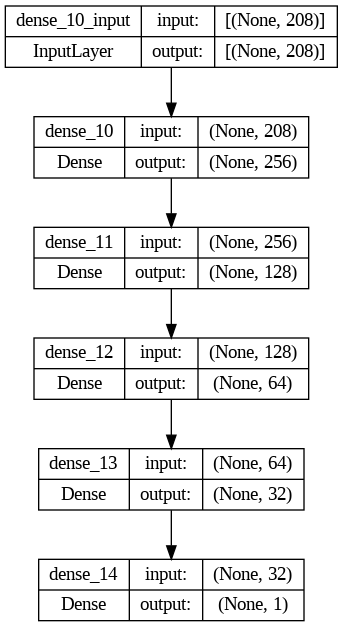

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM
import tensorflow.keras as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.datasets import imdb
from tensorflow.keras.utils import plot_model


model = Sequential()
model.add(Dense(units=256, activation='relu', input_shape=(208,)))
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

plot_model(model, to_file='neural_network.png', show_shapes=True)

In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

history=model.fit(X_train, y_train,
          batch_size=64,
          epochs=5,
          validation_data=(X_test, y_test))

Epoch 1/5
562/562 [==============================] - 19s 30ms/step - loss: 490221.7812 - accuracy: 0.9253 - val_loss: 110943.7344 - val_accuracy: 0.9621
Epoch 2/5
562/562 [==============================] - 15s 27ms/step - loss: 84663.6094 - accuracy: 0.9258 - val_loss: 49157.4609 - val_accuracy: 0.9621
Epoch 3/5
562/562 [==============================] - 24s 43ms/step - loss: 17974.1582 - accuracy: 0.9297 - val_loss: 6273.5923 - val_accuracy: 0.9621
Epoch 4/5
562/562 [==============================] - 21s 37ms/step - loss: 12478.6348 - accuracy: 0.9253 - val_loss: 9913.9521 - val_accuracy: 0.9621
Epoch 5/5
562/562 [==============================] - 23s 40ms/step - loss: 1387.3629 - accuracy: 0.9292 - val_loss: 861.9175 - val_accuracy: 0.9622


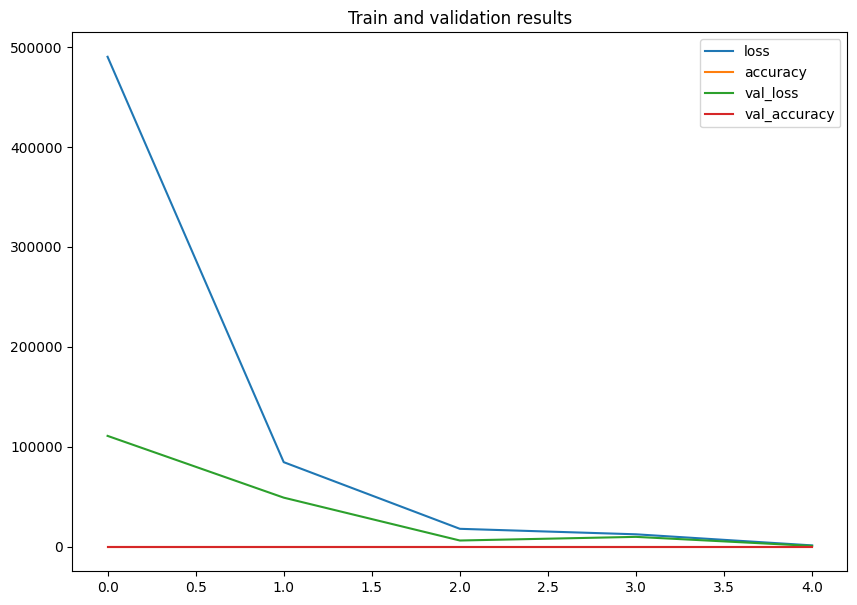

In [ ]:
pd.DataFrame(history.history).plot(title="Train and validation results",figsize=(10,7));

# Additional LSTM Layers ad DropOuts

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(LSTM(units=64, return_sequences=True, input_shape=(208,1)))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64, return_sequences=False))
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))

adam = Adam(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
model.fit(X_train, y_train, batch_size=64, epochs=1, validation_data=(X_test, y_test))


562/562 [==============================] - 686s 1s/step - loss: 0.1713 - accuracy: 0.9617 - val_loss: 0.1598 - val_accuracy: 0.9625


Extreemly slow for the large dataset. So looked at alternate ways

# Feedforward Deepneural network with fully connected layers

/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


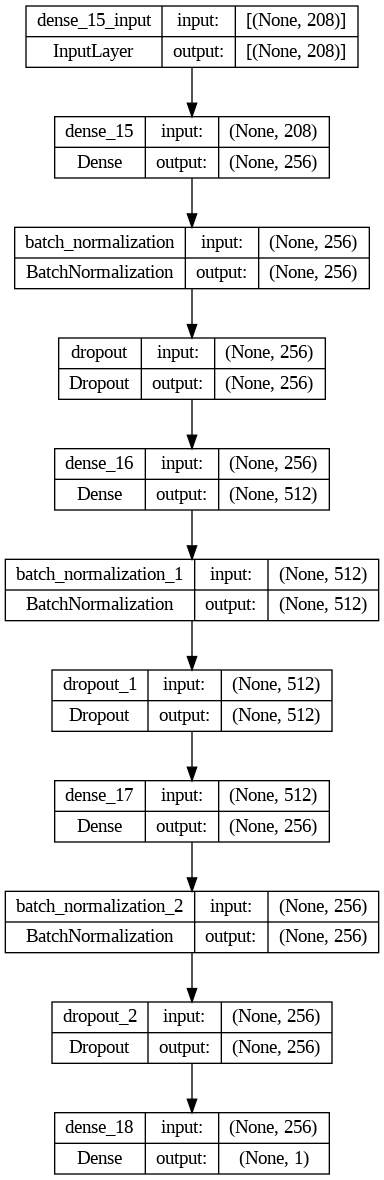

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from keras.optimizers import RMSprop

model = Sequential()

# Input layer
model.add(Dense(256, input_dim=208, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

# Hidden layers
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))


model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

# Output layer
model.add(Dense(1, activation='sigmoid'))

# Compile the model with RMSprop optimizer
rmsprop = RMSprop(lr=0.001)
model.compile(loss='binary_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
plot_model(model, to_file='neural_network.png', show_shapes=True)

In [ ]:
# Train the model
history=model.fit(X_train, y_train,
          batch_size=64,
          epochs=5,
          validation_data=(X_test, y_test))


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/optimizers/legacy/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


562/562 [==============================] - 53s 88ms/step - loss: 0.2426 - accuracy: 0.9310 - val_loss: 0.1719 - val_accuracy: 0.9642
Epoch 2/5
562/562 [==============================] - 51s 91ms/step - loss: 0.1739 - accuracy: 0.9613 - val_loss: 0.1647 - val_accuracy: 0.9643
Epoch 3/5
562/562 [==============================] - 50s 89ms/step - loss: 0.1705 - accuracy: 0.9613 - val_loss: 0.1650 - val_accuracy: 0.9642
Epoch 4/5
562/562 [==============================] - 50s 88ms/step - loss: 0.1676 - accuracy: 0.9615 - val_loss: 0.2009 - val_accuracy: 0.9641
Epoch 5/5
562/562 [==============================] - 43s 77ms/step - loss: 0.1669 - accuracy: 0.9616 - val_loss: 0.1803 - val_accuracy: 0.9641


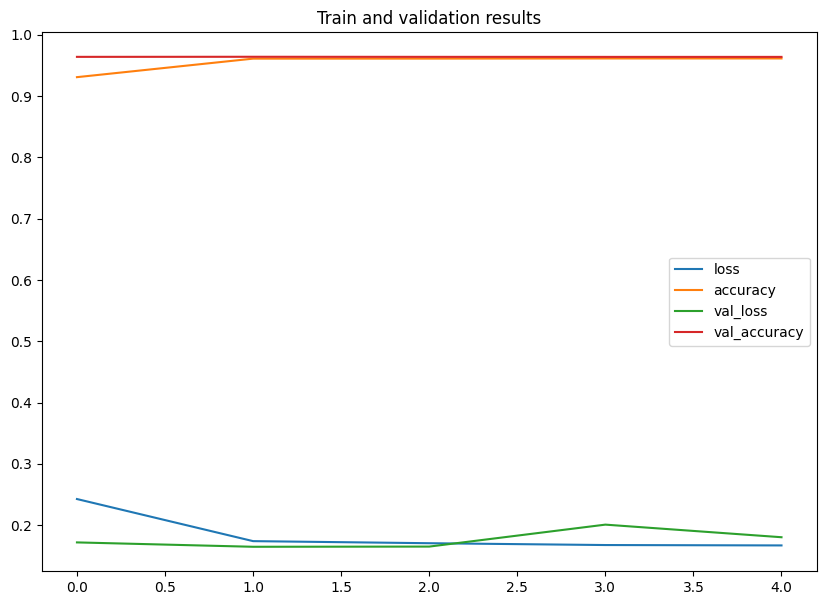

In [ ]:
pd.DataFrame(history.history).plot(title="Train and validation results",figsize=(10,7));

In [ ]:
from tensorflow.keras import metrics

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=[metrics.AUC(), metrics.Precision(),metrics.FalsePositives()])

history = model.fit(X_train, y_train,
                    batch_size=64,
                    epochs=5,
                    validation_data=(X_test, y_test))


Epoch 1/5
562/562 [==============================] - 45s 72ms/step - loss: 0.1666 - auc_2: 0.5347 - precision_2: 0.7059 - false_positives_2: 5.0000 - val_loss: 0.3568 - val_auc_2: 0.5320 - val_precision_2: 0.4444 - val_false_positives_2: 5.0000
Epoch 2/5
562/562 [==============================] - 41s 73ms/step - loss: 0.1660 - auc_2: 0.5469 - precision_2: 0.7500 - false_positives_2: 2.0000 - val_loss: 0.1965 - val_auc_2: 0.5263 - val_precision_2: 0.5000 - val_false_positives_2: 4.0000
Epoch 3/5
562/562 [==============================] - 39s 69ms/step - loss: 0.1690 - auc_2: 0.5070 - precision_2: 0.3889 - false_positives_2: 11.0000 - val_loss: 0.2835 - val_auc_2: 0.5044 - val_precision_2: 0.4444 - val_false_positives_2: 5.0000
Epoch 4/5
562/562 [==============================] - 42s 74ms/step - loss: 0.1666 - auc_2: 0.5129 - precision_2: 0.5714 - false_positives_2: 3.0000 - val_loss: 0.6308 - val_auc_2: 0.5044 - val_precision_2: 0.5000 - val_false_positives_2: 5.0000
Epoch 5/5
562/562 [

#Summary of Results
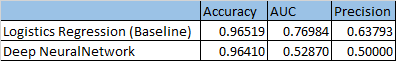


# Conclusion and Future Research

This study aimed to develop a deep learning model to predict business payment delinquency and bankruptcy using credit bureau data extracts. Although the model's performance was inferior to that of a logistic regression approach, the expectation was to outperform the latter. However, several factors may have impacted the model's performance, including the limited time to explore various architectures and parameter tuning due to resource constraints from having over 1000 features and a large number of observations. The model was trained with a maximum of 10 epochs. 

This study lays a good foundation for future exploration and improvement, possibly as a topic for a Master's thesis.